In [4]:
import pandas as pd
from textblob import TextBlob

hotels = pd.read_csv('hotels.zip')
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [166]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [3]:
list(hotels.select_dtypes(['int64','float64']).columns)

['additional_number_of_scoring',
 'average_score',
 'review_total_negative_word_counts',
 'total_number_of_reviews',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given',
 'reviewer_score',
 'lat',
 'lng']

В этом ноутбуке я попробую пойти по пути минимизации входных данных - безжалостно выкидывая то, что мне кажется несущественным и не сильно влияющим на результат. И первыми под нож пойдут lat и lng. Первые тесты показали, что их влияние на результат - крайне мало, в их данных есть пропуски, которые надо чем-то заполнить. Мне кажется, что усилия, затраченные на то, что-бы выудить какую-то полезную информацию из географических координат - не стоят того незначительного улучшения модели, которое возможно произойдёт.

In [5]:
def text_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity
    return polarity,subjectivity


In [38]:
a,b = text_sentiment('Perfect amazing hotel')
b


0.95

In [40]:
polarity_subjectivity = hotels['positive_review'].apply(text_sentiment)
hotels['positive_review_polarity'],hotels['positive_review_subjectivity'] = hotels['positive_review'].apply(text_sentiment)
#polarity_subjectivity
hotels['negative_review']
hotels[['positive_review_polarity','positive_review_subjectivity']]

ValueError: too many values to unpack (expected 2)

In [42]:
polarity_subjectivity

0                          (0.6000000000000001, 0.9)
1                                         (0.0, 0.0)
2         (-0.11363636363636363, 0.5454545454545454)
3          (0.42833333333333334, 0.6666666666666667)
4          (0.27749999999999997, 0.5966666666666667)
                             ...                    
386798                                    (0.0, 0.0)
386799     (0.2474891774891775, 0.47521645021645026)
386800      (0.4666666666666666, 0.7023809523809524)
386801                                    (0.2, 0.3)
386802      (0.4508333333333333, 0.7000000000000001)
Name: positive_review, Length: 386803, dtype: object

In [35]:
#hotels[['first_value', 'second_value']] = polarity_subjectivity.apply(lambda x: pd.Series(eval(x)))
#hotels[['first_value', 'second_value']] = polarity_subjectivity.apply(lambda x: pd.Series(x.strip('()').split(', ')).astype(float))
hotels[['first_value', 'second_value']] = polarity_subjectivity.apply(lambda x: pd.Series(x))
#hotels[['first_value', 'second_value']] = hotels['positive_review'].apply(lambda x: pd.Series(list(zip(*x))[0]), pd.Series(list(zip(*x))[1]))


hotels[['first_value', 'second_value']]


,first_value,second_value
0,0.600000,0.900000
1,0.000000,0.000000
2,-0.113636,0.545455
3,0.428333,0.666667
4,0.277500,0.596667
...,...,...
386798,0.000000,0.000000
386799,0.247489,0.475216
386800,0.466667,0.702381
386801,0.200000,0.300000


In [167]:
#hotels = hotels.drop(['lat','lng'], axis=1)
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

Далее - сами обзоры текстом нам ничем не помогут. А вот количество слов - может. Причем, как мне кажется, важны не абсолютные цифры слов, а их отнощение. Создадим два новых признака - отношение количества позитивных слов к негативным. Два - потому-что одно будет арифметическое отличие, второе - деление. Пока не знаю, какое будет сильней влиять - посмотрим потом.

In [168]:
#hotels = hotels.drop(['positive_review','negative_review'], axis=1)

In [169]:
hotels['review_word_counts_related'] = hotels['review_total_positive_word_counts'] - hotels['review_total_negative_word_counts']
hotels['review_word_counts_related_divide'] = (hotels['review_total_positive_word_counts'] + 1) / (hotels['review_total_negative_word_counts'] + 1)
hotels['review_word_counts_related_divide'].value_counts()

1.000000    11898
7.000000     5462
0.500000     5329
6.000000     5315
5.000000     5068
            ...  
3.633333        1
0.110701        1
0.781022        1
0.013263        1
0.484127        1
Name: review_word_counts_related_divide, Length: 10127, dtype: int64

In [176]:
num_cols = ['review_total_negative_word_counts', 'review_total_positive_word_counts','review_word_counts_related','review_word_counts_related_divide']
# категориальные признаки
cat_cols = ['average_score']

<AxesSubplot: >

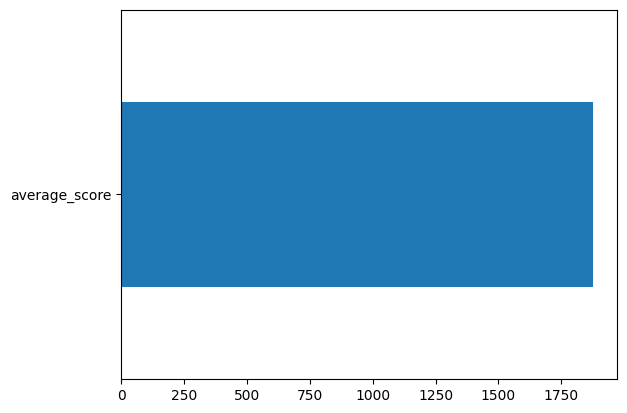

In [177]:
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 
y=y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<AxesSubplot: >

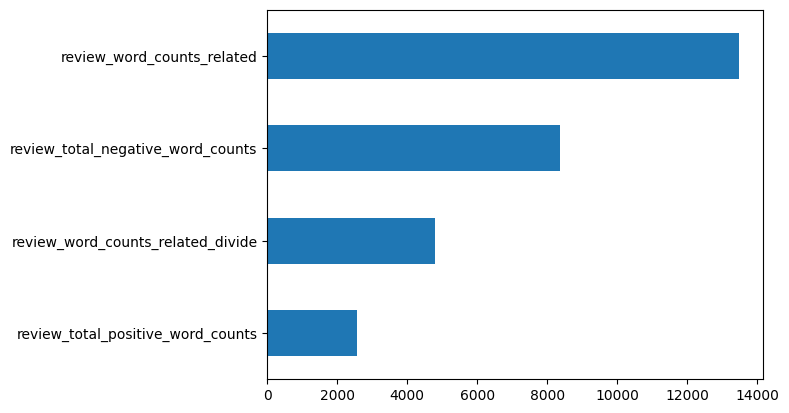

In [175]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [119]:
hotels = hotels.drop(['review_total_positive_word_counts','review_total_negative_word_counts'], axis=1)
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 13 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   total_number_of_reviews                     386803 non-null  int64  
 7   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 8   reviewer_score                              386803 non-null  float64
 9   tags                                        386803 non-null  object 
 

Следущими под нож пустим те данные, из которых я или не представляю, как получить что-то полезное, или считаю, что их влияние слишком незначительное, как нам показали предварительные непараметрические тесты. От адреса отеля тоже пока избавимся, оставим его на другие варианты. Из него можно выудить полезную информацию, но в рамках этого конкретного ноутбука с минимизацией затрат и данных - его пока выкинем. Имя отеля - в этом ноутбуке пока тоже отбросим. В конце концов, нам не столько важно имя, сколько оценка, которую ставили этому отелю другие пользователи. А именно этот параметр мы-юы рассматривали, если-б стали учитывать имя.

In [120]:
hotels = hotels.drop(['days_since_review','additional_number_of_scoring','days_since_review'], axis=1)
hotels = hotels.drop(['hotel_address'], axis=1)
hotels = hotels.drop(['hotel_name'], axis=1)
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   review_date                                 386803 non-null  object 
 1   average_score                               386803 non-null  float64
 2   reviewer_nationality                        386803 non-null  object 
 3   total_number_of_reviews                     386803 non-null  int64  
 4   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 5   reviewer_score                              386803 non-null  float64
 6   tags                                        386803 non-null  object 
 7   review_word_counts_related                  386803 non-null  int64  
 8   review_word_counts_related_divide           386803 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 26.6+ MB


Побудем немного националистами, и предположим, что национальность человека влияет на то, как он, в целом, оценивает. Превратим графу "национальность" в категорию

In [121]:
hotels['reviewer_nationality'].value_counts()


 United Kingdom               184033
 United States of America      26541
 Australia                     16239
 Ireland                       11126
 United Arab Emirates           7617
                               ...  
 Cook Islands                      1
 Guinea                            1
 Comoros                           1
 Anguilla                          1
 Grenada                           1
Name: reviewer_nationality, Length: 225, dtype: int64

In [122]:
nationality=hotels['reviewer_nationality'].value_counts().nlargest(30).index
hotels['reviewer_nationality']=hotels['reviewer_nationality'].apply(lambda x: x if x in nationality else 'other')
hotels['reviewer_nationality'].value_counts()

 United Kingdom               184033
other                          46116
 United States of America      26541
 Australia                     16239
 Ireland                       11126
 United Arab Emirates           7617
 Saudi Arabia                   6722
 Netherlands                    6608
 Switzerland                    6498
 Canada                         5984
 Germany                        5956
 France                         5543
 Israel                         4918
 Italy                          4562
 Belgium                        4529
 Turkey                         4105
 Kuwait                         3702
 Spain                          3529
 Romania                        3425
 Russia                         2953
 South Africa                   2888
 China                          2564
 Sweden                         2562
 India                          2559
 Greece                         2536
 New Zealand                    2445
 Singapore                      2311
 

In [123]:
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].astype('category') # преобразуем тип столбца
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   review_date                                 386803 non-null  object  
 1   average_score                               386803 non-null  float64 
 2   reviewer_nationality                        386803 non-null  category
 3   total_number_of_reviews                     386803 non-null  int64   
 4   total_number_of_reviews_reviewer_has_given  386803 non-null  int64   
 5   reviewer_score                              386803 non-null  float64 
 6   tags                                        386803 non-null  object  
 7   review_word_counts_related                  386803 non-null  int64   
 8   review_word_counts_related_divide           386803 non-null  float64 
dtypes: category(1), float64(3), int64(3), object(2)
memory usage

Далее - дата. Не думаю, что год, или число, как-то может повлиять на оценку, а вот время года - вполне может. Месяца будет достаточно.

In [124]:
hotels['review_month']= pd.DatetimeIndex(pd.to_datetime(hotels['review_date'])).month
hotels = hotels.drop(['review_date'], axis=1)
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   average_score                               386803 non-null  float64 
 1   reviewer_nationality                        386803 non-null  category
 2   total_number_of_reviews                     386803 non-null  int64   
 3   total_number_of_reviews_reviewer_has_given  386803 non-null  int64   
 4   reviewer_score                              386803 non-null  float64 
 5   tags                                        386803 non-null  object  
 6   review_word_counts_related                  386803 non-null  int64   
 7   review_word_counts_related_divide           386803 non-null  float64 
 8   review_month                                386803 non-null  int64   
dtypes: category(1), float64(3), int64(4), object(1)
memory usage

Последними остались теги. С ними повозиться придётся, но в них множество информации

In [125]:
tags = hotels['tags'].str.lower()

In [126]:
tag = tags.str.replace('[','').str.replace(']','').str.replace('"','').str.replace("'",'').str.replace(' ','').str.split(',').explode()
tag.value_counts()

C:\Users\trigubov\AppData\Local\Temp\ipykernel_17244\2048240499.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tag = tags.str.replace('[','').str.replace(']','').str.replace('"','').str.replace("'",'').str.replace(' ','').str.split(',').explode()


leisuretrip                            313593
submittedfromamobiledevice             230778
couple                                 189212
stayed1night                           145373
stayed2nights                          100263
                                        ...  
suitewithgardenviewandparking               1
familyroomtwoconnectingrooms3adults         1
twoadjacentdoubleroom                       1
greenparksuite                              1
executivedoubleroomnonsmoking               1
Name: tags, Length: 2352, dtype: int64

Итого, у нас 2352 уникальных тега. Это слишком много. Мне кажется, важным будет только количество тегов в оценке, и первые 20-30 тегов.

In [134]:
hotels['tags_count'] = hotels['tags'].str.count(',')
hotels['tags_count']

0         4
1         3
2         4
3         3
4         3
         ..
386798    4
386799    4
386800    3
386801    3
386802    3
Name: tags_count, Length: 386803, dtype: int64

In [140]:
hotels['tags_count'].value_counts()

4    223455
3    158589
2      4126
5       563
1        65
0         5
Name: tags_count, dtype: int64

In [158]:
tags = hotels['tags'].str.lower().str.replace('[','').str.replace(']','').str.replace('"','').str.replace("'",'').str.replace(' ','').str.split(',')
hotels['tags'] = tags
hotels['tags']


C:\Users\trigubov\AppData\Local\Temp\ipykernel_17244\3511597507.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tags = hotels['tags'].str.lower().str.replace('[','').str.replace(']','').str.replace('"','').str.replace("'",'').str.replace(' ','').str.split(',')


0         [leisuretrip, couple, studiosuite, stayed2nigh...
1         [businesstrip, couple, standarddoubleroom, sta...
2         [leisuretrip, solotraveler, moderndoubleroomec...
3         [leisuretrip, solotraveler, standardroomwith1d...
4         [businesstrip, couple, standarddoubleortwinroo...
                                ...                        
386798    [leisuretrip, group, clubdoubleortwinroom, sta...
386799    [leisuretrip, couple, standarddoubleroom, stay...
386800    [businesstrip, solotraveler, singleroom, staye...
386801    [leisuretrip, solotraveler, deluxedoubleroom, ...
386802    [leisuretrip, couple, bunkbedroom, stayed4nights]
Name: tags, Length: 386803, dtype: object

In [153]:
# выделим 30 наиболее часто встречающизся тегов
tag_top30=tag.value_counts().nlargest(30).index
tag_top30

Index(['leisuretrip', 'submittedfromamobiledevice', 'couple', 'stayed1night',
       'stayed2nights', 'solotraveler', 'stayed3nights', 'businesstrip',
       'group', 'familywithyoungchildren', 'stayed4nights', 'doubleroom',
       'standarddoubleroom', 'superiordoubleroom', 'familywitholderchildren',
       'deluxedoubleroom', 'doubleortwinroom', 'stayed5nights',
       'standarddoubleortwinroom', 'classicdoubleroom',
       'superiordoubleortwinroom', '2rooms', 'stayed6nights',
       'standardtwinroom', 'singleroom', 'twinroom', 'stayed7nights',
       'executivedoubleroom', 'classicdoubleortwinroom', 'superiortwinroom'],
      dtype='object')

Делать 30 лишних бинарных столбцов

In [160]:
for i in tag_top30:
    name = 'tag_' + i
    hotels[name] = hotels['tags'].apply(lambda x: 1 if i in x else 0)

hotels.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 40 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   average_score                               386803 non-null  float64 
 1   reviewer_nationality                        386803 non-null  category
 2   total_number_of_reviews                     386803 non-null  int64   
 3   total_number_of_reviews_reviewer_has_given  386803 non-null  int64   
 4   reviewer_score                              386803 non-null  float64 
 5   tags                                        386803 non-null  object  
 6   review_word_counts_related                  386803 non-null  int64   
 7   review_word_counts_related_divide           386803 non-null  float64 
 8   review_month                                386803 non-null  int64   
 9   tags_count                                  386803 non-null

In [155]:
hotels

,average_score,reviewer_nationality,total_number_of_reviews,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,review_word_counts_related,review_word_counts_related_divide,review_month,tags_count
0,8.4,United Kingdom,1994,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",1,1.250000,2,4
1,8.3,United Kingdom,1361,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",-1,0.750000,1,3
2,8.9,China,406,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",-6,0.142857,10,4
3,7.5,United Kingdom,607,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",11,12.000000,9,3
4,8.5,Poland,7586,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",16,4.200000,3,3
...,...,...,...,...,...,...,...,...,...,...
386798,9.0,France,617,10,8.8,"[' Leisure trip ', ' Group ', ' Club Double or...",10,11.000000,4,4
386799,8.4,Turkey,3224,1,9.2,"[' Leisure trip ', ' Couple ', ' Standard Doub...",93,94.000000,2,4
386800,6.8,Netherlands,2751,21,8.3,"[' Business trip ', ' Solo traveler ', ' Singl...",-3,0.769231,2,3
386801,8.1,United Arab Emirates,1567,28,9.2,"[' Leisure trip ', ' Solo traveler ', ' Deluxe...",6,7.000000,5,3


In [ ]:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', 'review_total_positive_word_counts']

In [178]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 19 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 